## This notebook provide the instructions on how to read the DYAMOND data from the SealStorage using OpenVisus framework.

### To run this notebook properly, you need to install the library `OpenVisus`. To install this, please run the following command from your terminal:
`pip install OpenVisus`

# **Step 1: Importing the libraries**

In [1]:
import numpy as np
import OpenVisus as ov
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### The section below shows different LLC2160 fields we have available in cloud. 

### set the variable

In [2]:
variable='salt' # options are: u,v,w,salt,theta

In [3]:
# DONOT TOUCH
base_url= "https://nsdf-climate3-origin.nationalresearchplatform.org:50098/nasa/nsdf/climate3/dyamond/"
if variable=="theta" or variable=="w":
    base_dir=f"mit_output/llc2160_{variable}/llc2160_{variable}.idx"
elif variable=="u":
    base_dir= "mit_output/llc2160_arco/visus.idx"
else:
    base_dir=f"mit_output/llc2160_{variable}/{variable}_llc2160_x_y_depth.idx"


In [4]:
field= base_url+base_dir

## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [5]:
db=ov.LoadDataset(field)
print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
print(f'Total Timesteps: {len(db.getTimesteps())}')
print(f'Field: {db.getField().name}')
print('Data Type: float32')

Dimensions: 8640*6480*90
Total Timesteps: 10366
Field: salt
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize. 

In [6]:
data=db.read(time=0,quality=-18,z=[0,1])
data.shape

(1, 102, 135)

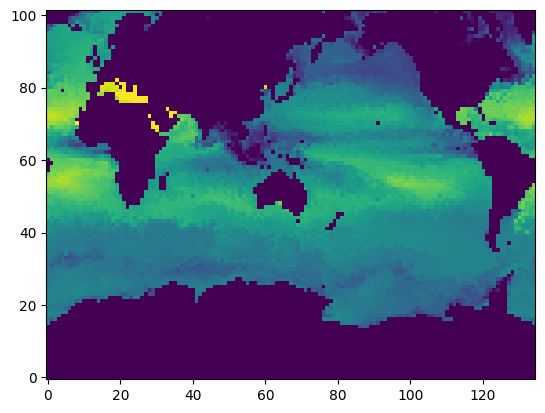

In [7]:
plt.imshow(data[0],origin='lower',vmin=31,vmax=38)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

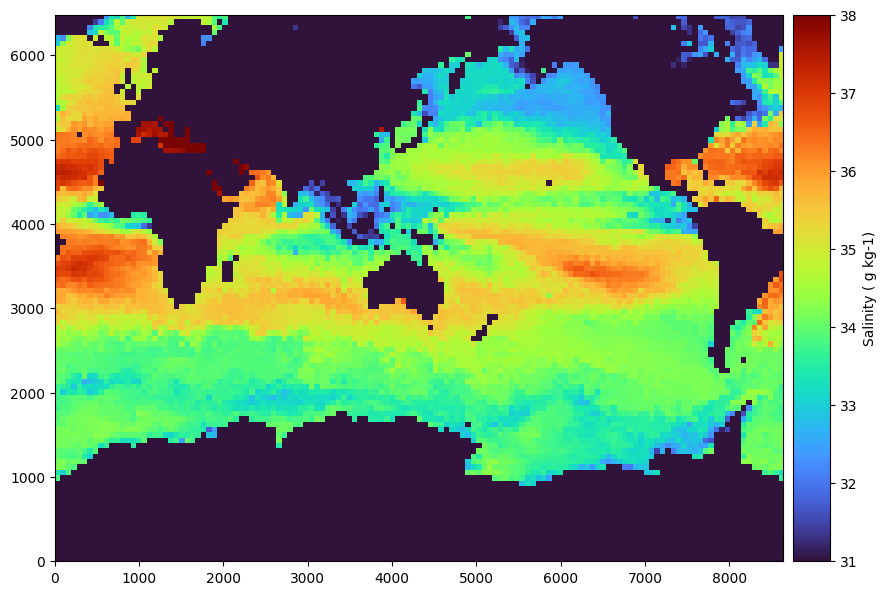

In [8]:
fig,axes=plt.subplots(1,1, figsize=(10,8))
axes.set_xlim(0,8640)
axes.set_ylim(0,6480)
im=axes.imshow(data[0,:,:],extent=[0,8640,0,6480],origin='lower',cmap='turbo',vmin=31,vmax=38)
divider = make_axes_locatable(axes)
cax = divider.append_axes("right",  size="5%", pad=0.1)  # Adjust size and pad as needed

cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Salinity ( g kg-1)')
plt.show()

## **But, what if you want to see the full data for a certain region at a certain depth?**
Just set the right x,y,z while reading the data. x and y are the bounding box, z is the depth/layer. 

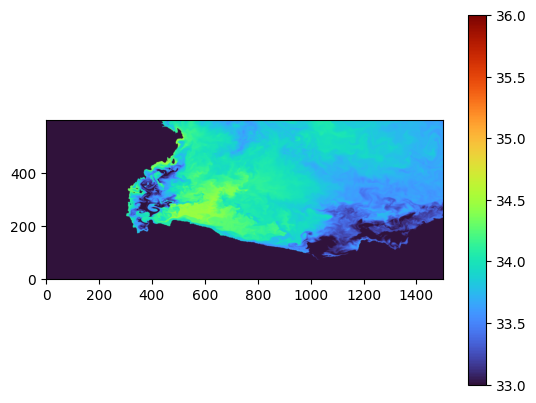

In [9]:
data1=db.read(time=0,z=[0,1],x=[4500,6000],y=[800,1400],quality=0)
plt.imshow(data1[0,:,:], origin='lower',vmin=33,vmax=36,cmap='turbo')
plt.colorbar()


# **Step 5: Save the data for the region locally**
You can save the data locally as you want. For example, here we are only saving the region shown above as a numpy array.

In [10]:
np.save('test_region1.npy', data1)

# **Step 6: Load the locally saved region and visualize using matplotlib**

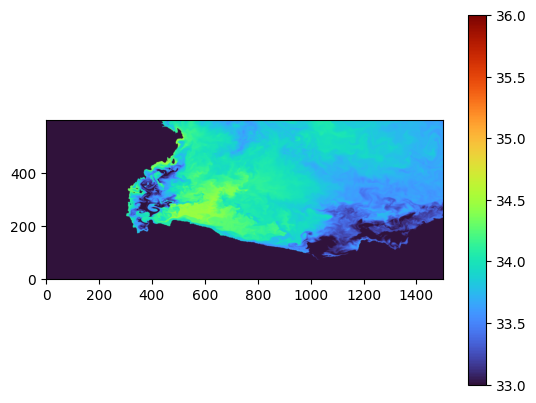

In [11]:
local_data=np.load('test_region1.npy')
plt.imshow(local_data[0,:,:], origin='lower',vmin=33,vmax=36,cmap='turbo')
plt.colorbar()

### *Please reach out to Aashish Panta, Giorgio Scorzelli or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Giorgio Scorzelli (scrgiorgio@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)